# Installing packages & Extract Dataset

In [28]:
!pip install kaggle

In [29]:
!mkdir -p ~/.kaggle
# Importing Secrets
from kaggle_secrets import UserSecretsClient
import json
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("UserName")
secret_value_1 = user_secrets.get_secret("key")
secret_dict = {"username":secret_value_0,"key":secret_value_1}
!mkdir -p kaggle_secrets
json.dump(secret_dict, open("kaggle_secrets/kaggle.json","w"))
!cp kaggle_secrets/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
#downloading dataset from kaggle api
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
!ls

__notebook_source__.ipynb  kaggle_secrets	 test.7z   trainLabels.csv
cifar-10.zip		   sampleSubmission.csv  train.7z


In [32]:
# extracting the data from compressed zip
from zipfile import ZipFile

dataset = '/kaggle/working/cifar-10.zip'

#to extract zipfile
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('extration completed')

extration completed


In [33]:
!ls

__notebook_source__.ipynb  kaggle_secrets	 test.7z   trainLabels.csv
cifar-10.zip		   sampleSubmission.csv  train.7z


In [34]:
!pip install py7zr #install this package to extract the 7z files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 458.7 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.2/379.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.3 MB/s eta 0:00:00


In [35]:
import py7zr

archive = py7zr.SevenZipFile('/kaggle/working/train.7z', mode='r')
archive.extractall(path="/kaggle/working/TrainDataset/")
archive.close()

In [36]:
!ls

TrainDataset		   kaggle_secrets	 train.7z
__notebook_source__.ipynb  sampleSubmission.csv  trainLabels.csv
cifar-10.zip		   test.7z


# Importing Libraries

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [38]:
filenames = os.listdir('/kaggle/working/TrainDataset/train')

In [39]:
print(len(filenames))

50000


In [73]:
print(filenames[0:5]) #First five items
print(filenames[-5:]) # last five items

['4564.png', '6068.png', '18266.png', '24615.png', '13195.png']
['36429.png', '47515.png', '22280.png', '11459.png', '42578.png']


## Label Manual Encoding and Processing

In [41]:
labels_data = pd.read_csv('/kaggle/working/trainLabels.csv')

In [42]:
labels_data.shape

(50000, 2)

In [43]:
labels_data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [44]:
labels_data.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [45]:
print(labels_data[labels_data['id'] == 33967]) #find the id

          id  label
33966  33967  truck


In [46]:
# checking any values are null or missing
labels_data['label'].isnull().sum()

0

In [47]:
# finding how many labels are same use (grouping)
labels_data['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [48]:
# grouping in ascending(Alphabetic Order) order label encode format
label_encoder_dict = {"automobile" : 0, "airplane" : 1, "bird" : 2, "cat" : 3, "deer" : 4, "dog" : 5, "frog" : 6, "horse" : 7, "ship" : 8, "truck" : 9}

In [49]:
label_encoded_list = [label_encoder_dict[label] for label in labels_data['label']]

In [50]:
label_encoded_list[0:10]

[6, 9, 9, 4, 0, 0, 2, 7, 8, 3]

In [51]:
print('testing')

testing


## Display Images

In [52]:
import cv2

#display image from the path
image = cv2.imread("/kaggle/working/TrainDataset/train/45888.png")
# converting image color back to RGB FROM BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

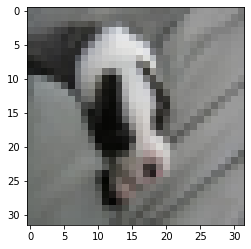

In [53]:
# display the image using Matplot Lib
plt.imshow(image)

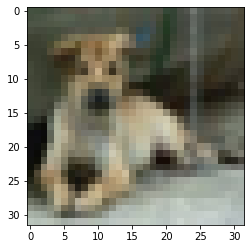

In [54]:
#display image from the path
image = cv2.imread("/kaggle/working/TrainDataset/train/43879.png")
# converting image color back to RGB FROM BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# display the image using Matplot Lib
plt.imshow(image)

In [55]:
#storing label ids to array
ids_images = list(labels_data['id'])

In [56]:
print(ids_images[:5])
print(ids_images[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


## Image Processing

In [57]:
# convert image to numpy array

image_path= "/kaggle/working/TrainDataset/train/"

data = []

for id in ids_images:
    img = Image.open(image_path + str(id) + ".png")
    img = np.array(img)
    data.append(img)

In [58]:
data[0].shape #shape of the 2d array.

(32, 32, 3)

In [59]:
# convert image list and label list to numpy array

X = np.array(data)
y = np.array(label_encoded_list)

In [60]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


## Splitting Data Into Train and Test Set

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2) 

In [62]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [63]:
# Scaling the train and test set datas

X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building Neural Network

In [64]:
import tensorflow as tf
from tensorflow import keras

In [65]:
# setting up the layers of neural network 
number_of_classes = 10 
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32,32,3)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(number_of_classes,activation='softmax'))

2023-01-19 04:20:45.908831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 04:20:45.909868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 04:20:46.070720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 04:20:46.071727: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 04:20:46.072500: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [66]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [67]:
# training the neural network
model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

2023-01-19 04:20:49.914582: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 442368000 exceeds 10% of free system memory.
2023-01-19 04:20:50.455343: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 442368000 exceeds 10% of free system memory.
2023-01-19 04:20:50.839289: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1125/1125 [==============================] - 5s 2ms/step - loss: 2.0315 - acc: 0.2287 - val_loss: 1.9796 - val_acc: 0.2482
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 1.9402 - acc: 0.2748 - val_loss: 1.9141 - val_acc: 0.2767
Epoch 3/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.9113 - acc: 0.2966 - val_loss: 1.8853 - val_acc: 0.2870
Epoch 4/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.8998 - acc: 0.2996 - val_loss: 1.8669 - val_acc: 0.2925
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 1.8876 - acc: 0.3055 - val_loss: 1.8782 - val_acc: 0.3015
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 1.8793 - acc: 0.3081 - val_loss: 1.8899 - val_acc: 0.2985
Epoch 7/10
1125/1125 [==============================] - 3s 2ms/step - loss: 1.8720 - acc: 0.3090 - val_loss: 1.8515 - val_acc: 0.3130
Epoch 8/10
1125/1125 [==============================] - 3s 2ms

## Resnet50 Keras Model Using

In [68]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

### Creating Model 

In [69]:
cnn_model = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
cnn_model.summary() # Layer details and Output Shape

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________

In [70]:
model = keras.Sequential()
# here upscaling the image size to set the restnet50 inputshape that i used (256,256,3) 3 for RGB(color)
model.add(layers.UpSampling2D((2,2)))# scaling the image from 32 to 64
model.add(layers.UpSampling2D((2,2)))# scaling the image from 64 to 128
model.add(layers.UpSampling2D((2,2)))# scaling the image from 128 to 256
model.add(cnn_model) # passing all the layers of Resnet50
model.add(layers.Flatten())# for converting matrics into vector (for single column)
model.add(layers.BatchNormalization())#Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))#to avoid overfitting use dropout to turn off some layers
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10,activation='softmax'))#using softmax for output layer


In [71]:
#optimizing the model
#try different optimizer to check the result weather it has more acc score or not.
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [72]:
# training the model
trainded_model = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10) # History Object

2023-01-19 04:21:20.844724: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 442368000 exceeds 10% of free system memory.
2023-01-19 04:21:21.385959: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 442368000 exceeds 10% of free system memory.


Epoch 1/10


2023-01-19 04:21:33.503057: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1125/1125 [==============================] - 495s 422ms/step - loss: 1.7171 - acc: 0.4318 - val_loss: 0.9085 - val_acc: 0.7665
Epoch 2/10
1125/1125 [==============================] - 478s 425ms/step - loss: 1.0337 - acc: 0.6946 - val_loss: 0.4555 - val_acc: 0.8963
Epoch 3/10
1125/1125 [==============================] - 482s 429ms/step - loss: 0.7544 - acc: 0.8052 - val_loss: 0.3567 - val_acc: 0.9212
Epoch 4/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.5712 - acc: 0.8695 - val_loss: 0.2741 - val_acc: 0.9330
Epoch 5/10
1125/1125 [==============================] - 482s 428ms/step - loss: 0.4535 - acc: 0.9075 - val_loss: 0.2499 - val_acc: 0.9348
Epoch 6/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.3578 - acc: 0.9340 - val_loss: 0.2519 - val_acc: 0.9340
Epoch 7/10
1125/1125 [==============================] - 482s 429ms/step - loss: 0.2858 - acc: 0.9522 - val_loss: 0.2322 - val_acc: 0.9395
Epoch 8/10
1125/1125 [=======================

In [86]:
# Evaluating the test set to collect the accuracy score and compare to train set result 
# To check the model is overfitting or not.
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print(f'test loss :{loss},\n test accuracy :{accuracy}')

313/313 [==============================] - 37s 117ms/step - loss: 0.2291 - acc: 0.9388
test loss :0.2290787547826767,
 test accuracy :0.9387999773025513


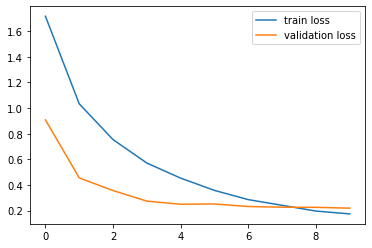

In [79]:
# plot the loss value 
plt.plot(trainded_model.history['loss'],label='train loss')
plt.plot(trainded_model.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

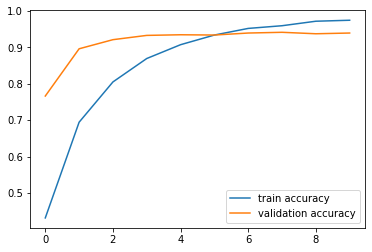

In [80]:
# plot the accuracy value 
plt.plot(trainded_model.history['acc'],label='train accuracy')
plt.plot(trainded_model.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

In [1]:
# import pickle
# !mkdir -p model
# file_name = 'model/trained_resnet50_model.pkl'
# pickle.dump(model,open(file_name,'wb'))